# Build Model

- load tensorflow
- load matplotlib
- load data
- preprocess images to convert pixel values to be between 0 and 1
- define the neural network 
- compile the model

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the data
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Preprocess the data
train_images = train_images / 255.0
test_images = test_images / 255.0
raw_train_labels = train_labels
raw_test_labels = test_labels
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

# Define the neural network architecture
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

2023-03-24 09:47:00.323688: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-24 09:47:02.866063: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/extras/CUPTI/lib64:/usr/local/cuda/compat/lib:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-24 09:47:02.866372: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/extras

# Train the model
- for 10 epochs

In [2]:
# Train the model
model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))

Epoch 1/20


2023-03-24 09:47:13.141893: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8700
2023-03-24 09:47:14.077071: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7fa92c135860 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-03-24 09:47:14.077136: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 2070, Compute Capability 7.5
2023-03-24 09:47:14.102104: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-03-24 09:47:14.508413: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1563/1563 [==============================] - 19s 10ms/step - loss: 1.4212 - accuracy: 0.4962 - val_loss: 1.2096 - val_accuracy: 0.5712
Epoch 2/20
1563/1563 [==============================] - 15s 10ms/step - loss: 1.1265 - accuracy: 0.6062 - val_loss: 1.1240 - val_accuracy: 0.6054
Epoch 3/20
1563/1563 [==============================] - 15s 9ms/step - loss: 0.9977 - accuracy: 0.6527 - val_loss: 1.1315 - val_accuracy: 0.6053
Epoch 4/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.9039 - accuracy: 0.6853 - val_loss: 1.0598 - val_accuracy: 0.6309
Epoch 5/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.8192 - accuracy: 0.7134 - val_loss: 1.0509 - val_accuracy: 0.6348
Epoch 6/20
1563/1563 [==============================] - 15s 9ms/step - loss: 0.7426 - accuracy: 0.7399 - val_loss: 1.0248 - val_accuracy: 0.6537
Epoch 7/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.6687 - accuracy: 0.7642 - val_loss: 1.0588 - val_accuracy:

# Make predictions

- Predict on test set and print labels

313/313 [==============================] - 1s 3ms/step


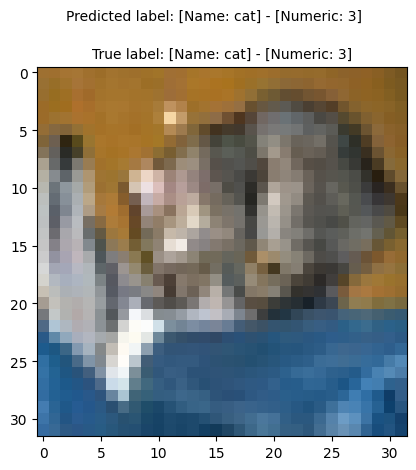

Predicted label: [Name: cat] - [Numeric: 3]
313/313 [==============================] - 1s 3ms/step


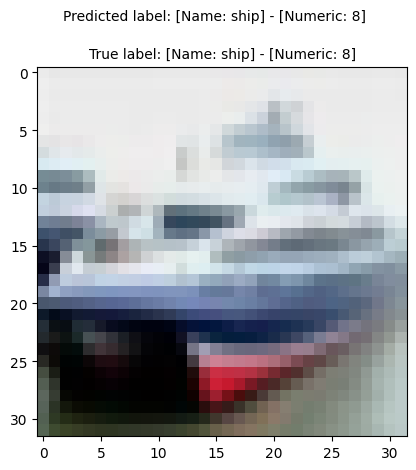

Predicted label: [Name: ship] - [Numeric: 8]
313/313 [==============================] - 1s 3ms/step


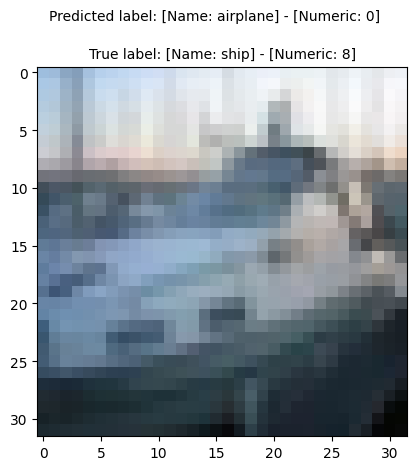

Predicted label: [Name: airplane] - [Numeric: 0]
313/313 [==============================] - 1s 3ms/step


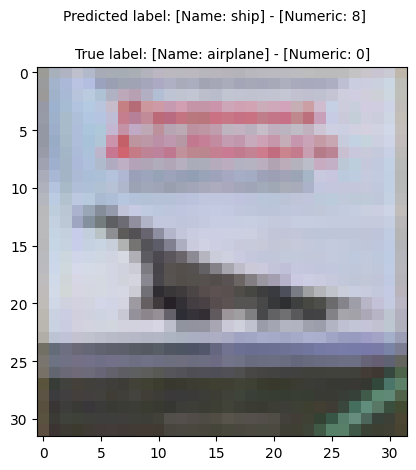

Predicted label: [Name: ship] - [Numeric: 8]
313/313 [==============================] - 1s 3ms/step


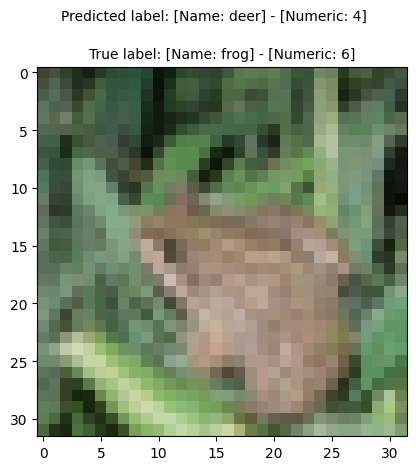

Predicted label: [Name: deer] - [Numeric: 4]
313/313 [==============================] - 1s 3ms/step


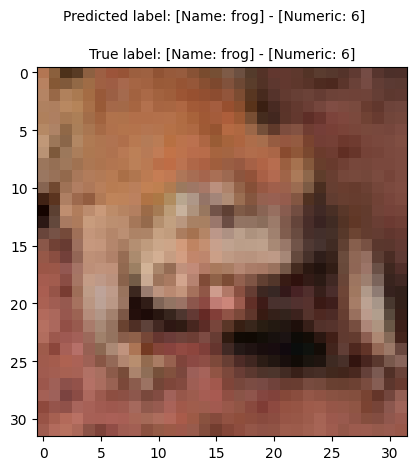

Predicted label: [Name: frog] - [Numeric: 6]
313/313 [==============================] - 1s 3ms/step


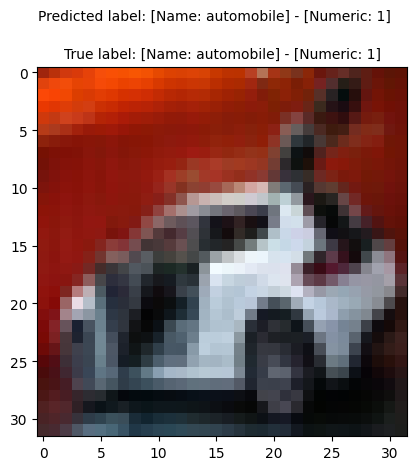

Predicted label: [Name: automobile] - [Numeric: 1]
313/313 [==============================] - 1s 3ms/step


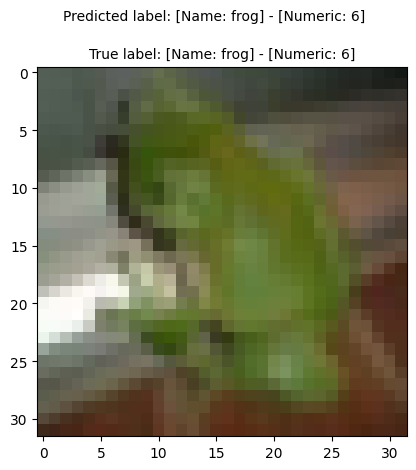

Predicted label: [Name: frog] - [Numeric: 6]
313/313 [==============================] - 1s 3ms/step


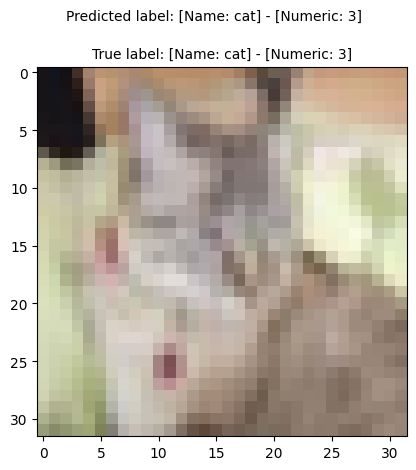

Predicted label: [Name: cat] - [Numeric: 3]
313/313 [==============================] - 1s 3ms/step


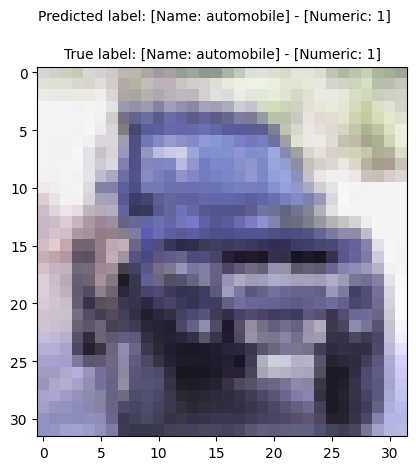

Predicted label: [Name: automobile] - [Numeric: 1]
313/313 [==============================] - 1s 3ms/step


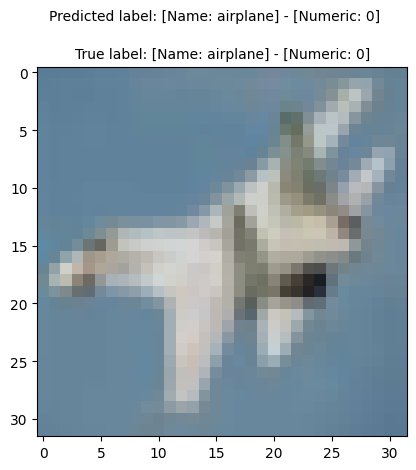

Predicted label: [Name: airplane] - [Numeric: 0]
313/313 [==============================] - 1s 3ms/step


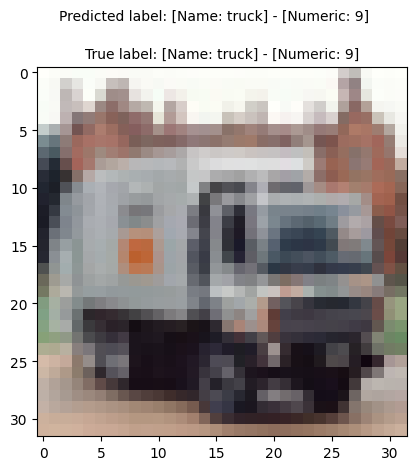

Predicted label: [Name: truck] - [Numeric: 9]


In [3]:
label_names = { 0: 'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}
# Show an example image and its associated class label from the test data
for image_index in range(12):
    plt.imshow(test_images[image_index])
    true_label_string = label_names[raw_test_labels[image_index][0]]
    plt.title(f"True label: [Name: {true_label_string}] - [Numeric: {str(raw_test_labels[image_index][0])}]",fontsize=10)
    predictions = model.predict(test_images)
    predicted_labels = tf.argmax(predictions, axis=1)
    predicted_label_string = label_names[predicted_labels[image_index].numpy()]
    plt.suptitle(f"Predicted label: [Name: {predicted_label_string}] - [Numeric: {str(predicted_labels[image_index].numpy())}]",fontsize=10, y=1)
    plt.show()
    # Make predictions on the test data
    
    # Show the predicted label for the example image
    print(f"Predicted label: [Name: {predicted_label_string}] - [Numeric: {str(predicted_labels[image_index].numpy())}]")

# Evaluate the model on the test data

After training a neural network, it's important to evaluate its performance on unseen data. In this section, we will evaluate the performance of our trained neural network on the test data using several metrics for multi-class classification.

In [4]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 - 1s - loss: 2.1634 - accuracy: 0.6243 - 1s/epoch - 4ms/step
Test loss: 2.163429021835327
Test accuracy: 0.6243000030517578


# Classification Report & Confusion Matrix
- The classification report shows the precision, recall, and F1 score for each class, as well as the accuracy and macro/micro averages.
- The confusion matrix shows the number of true positives, false positives, true negatives, and false negatives for each class.

In [5]:
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions on the test data
predictions = model.predict(test_images)

# Convert one-hot encoded vectors to class labels
predicted_labels = tf.argmax(predictions, axis=1)
true_labels = tf.argmax(test_labels, axis=1)

# Print the classification report
print('Classification Report:')
print(classification_report(true_labels, predicted_labels))

# Print the confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(true_labels, predicted_labels))

313/313 [==============================] - 1s 3ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.72      0.68      1000
           1       0.79      0.70      0.74      1000
           2       0.54      0.41      0.47      1000
           3       0.44      0.42      0.43      1000
           4       0.54      0.62      0.58      1000
           5       0.52      0.53      0.52      1000
           6       0.67      0.70      0.69      1000
           7       0.69      0.66      0.68      1000
           8       0.72      0.75      0.74      1000
           9       0.68      0.74      0.71      1000

    accuracy                           0.62     10000
   macro avg       0.62      0.62      0.62     10000
weighted avg       0.62      0.62      0.62     10000

Confusion Matrix:
[[716  12  45  24  24   9  13  13  95  49]
 [ 40 700   8  14   4  13  11   6  56 148]
 [ 94   5 414  77 154  82  84  47  27  16]
 [ 29  11  68 41

In [6]:
# install seaborn for heatmap
!pip install seaborn

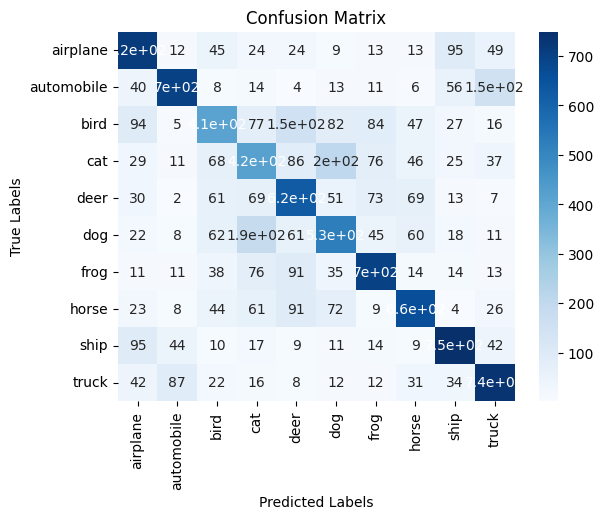

In [7]:
import seaborn as sns

# Define the label names
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Calculate the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Create a heatmap of the confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=label_names, yticklabels=label_names)

# Add labels and title to the heatmap
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Making predictions on new images
- load images unseen by the model and predict their classess

1/1 [==============================] - 0s 41ms/step


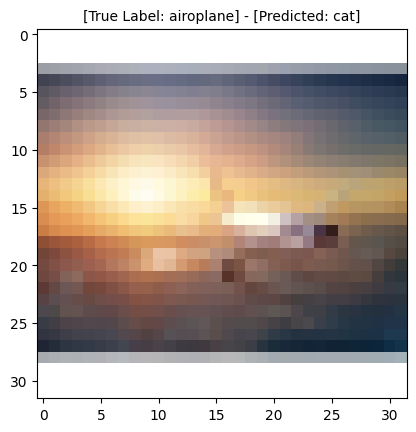

1/1 [==============================] - 0s 36ms/step


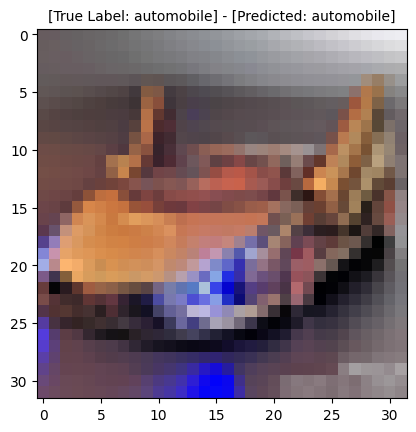

1/1 [==============================] - 0s 33ms/step


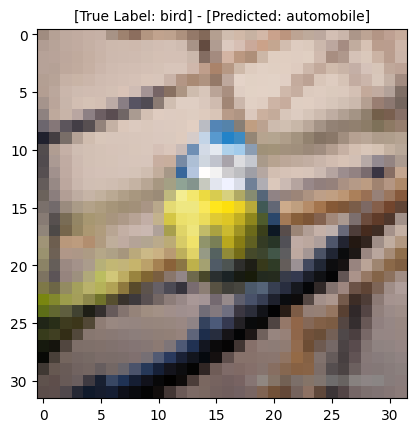

1/1 [==============================] - 0s 36ms/step


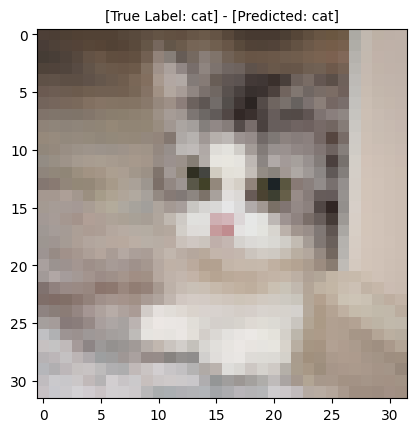

1/1 [==============================] - 0s 32ms/step


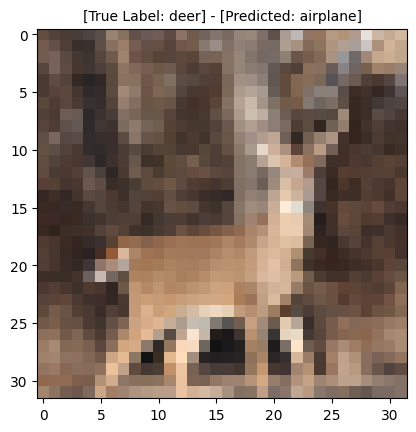

1/1 [==============================] - 0s 35ms/step


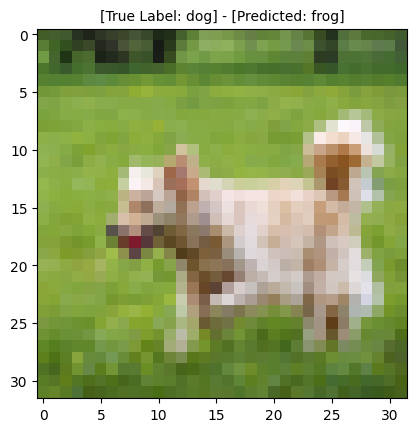

1/1 [==============================] - 0s 34ms/step


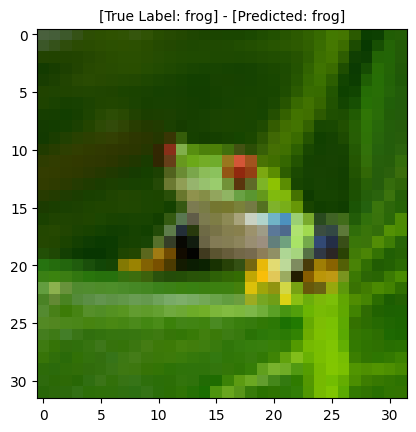

1/1 [==============================] - 0s 35ms/step


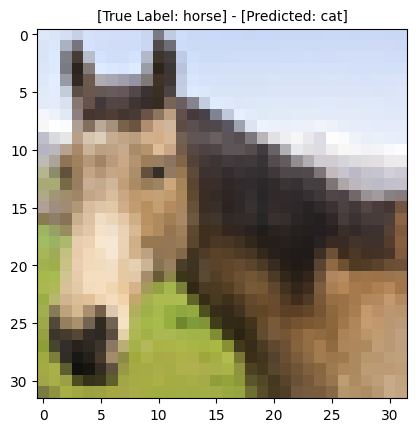

1/1 [==============================] - 0s 34ms/step


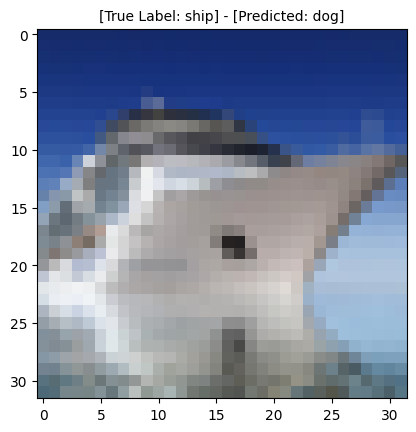

1/1 [==============================] - 0s 31ms/step


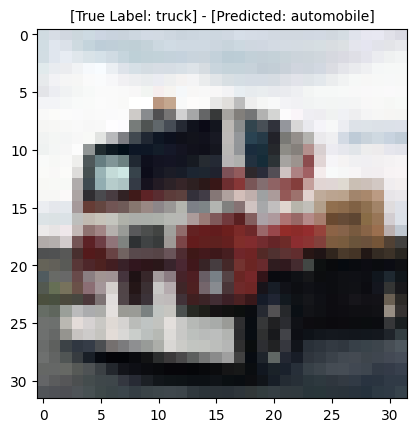

In [24]:
import numpy as np
from PIL import Image
image_files = { 
    0:('airoplane','../data/airoplane.jpg'),
    1:('automobile','../data/automobile.jpg'),
    2:('bird','../data/bird.jpg'),
    3:('cat','../data/cat.jpg'),
    4:('deer','../data/deer.jpg'),
    5:('dog','../data/dog.jpg'),
    6:('frog','../data/frog.jpg'),
    7:('horse','../data/horse.jpg'),
    8:('ship','../data/ship.jpg'),
    9:('truck','../data/truck.jpg')
}
for index in range(10):
    name, image_path = image_files[index]
    image = Image.open(image_path)
    image = Image.open(image_path)
    image = image.resize((32, 32))
    image = np.array(image)
    image = image / 255.0
    image_reshaped = image.reshape(1, 32, 32, 3)
    # Make a prediction on the new image
    prediction = model.predict(image_reshaped)

    # Convert the prediction to a class label
    predicted_label = np.argmax(prediction, axis=1)[0]
    # Define the label names
    label_names = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}
    # Print the predicted label
    predicted_label_name = label_names[predicted_label]
    plt.imshow(image)
    plt.title(f"[True Label: {name}] - [Predicted: {predicted_label_name}]",fontsize=10)
    plt.show()